In [15]:
import numpy as np
import matplotlib.pyplot as plt
%run zadanie1_neuron.ipynb

In [11]:
# Generowanie danych do regresji logistycznej
def genData(n, a, b, useNoise):
    result = np.zeros((n, 2)) #x_i=result[i][0], y_i=result[i][1]
    points = np.random.uniform(-10, 10, n)
    points = np.sort(points)
    for i in range(0, n):
        result[i][0] = points[i]
        result[i][1] = a * points[i] + b
        if useNoise == True:
            result[i][1] += 0.1 * np.random.normal()
        result[i][1]= 1.0 / (1.0 + np.exp(-result[i][1]))
    return result

data_reglog = genData(100, 1.5, 3, False)


## Regresja

Możemy przetestować taki zaprogramowany neuron na przykładzie regresji logistycznej. Chcemy dopasować neuronem następującą funkcję

$$ g(x)=sigm(ax+b)$$

Tym razem uczenie polega na wybraniu losowo przykładu ze zbioru danych, wywołaniu dla niego funkcji $forward$.
Później należy wyliczyć błąd poprzez porównanie wyniku z poprawną odpowiedzią (wziętą ze zbioru danych).
Następnie ten błąd podajemy jako argument funkcji $backward$.
Na koniec wywołujemy funkcję $learn$.
Te kroki powtarzamy aż do nauczenia się neuronu.

## Regression

We can test such a programmed neuron on the example of logistic regression. We want to match the following function with a neuron

$$ g(x)=sigm(ax+b)$$

This time learning consists in randomly selecting an example from the data set, calling $forward$ for it.
Then calculate the error by comparing the result with the correct answer (taken from the data set).
Then we pass this error as an argument to the $backward$ function.
Finally, we call the $learn$ function.
We repeat these steps until we learn the neuron.

In [12]:
def Neuron_reglog(neuron, data, learning_rate, steps):
    x = data[:,0]
    y = data[:,1]
    ### BEGIN SOLUTION
    for i in range(steps):
        k = int(np.random.uniform(len(x)))
        out = neuron.forward(np.array((data[k][0])))
        error = data[k][1] - out
        neuron.backward(error)
        neuron.learn(learning_rate)
    ### END SOLUTION


In [13]:
neuron=Neuron(1)
Neuron_reglog(neuron, data_reglog, 0.1, 100000)
print(str(neuron.weights[0])+' '+str(neuron.bias))

1.4704030898414209 2.927236018149109


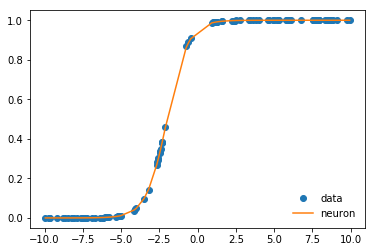

In [14]:
tmp=np.zeros((len(data_reglog)))
for i in range(len(data_reglog)):
    tmp[i]=neuron.forward(np.array((data_reglog[i][0])))
                         
plt.plot(data_reglog[:,0],data_reglog[:,1], 'o', label='data')
plt.plot(data_reglog[:,0],tmp, '-', label='neuron')
plt.legend(loc='lower right',frameon=False)

In [113]:
tmp_n = Neuron(1)
Neuron_reglog(tmp_n, data_reglog, 0.1, 100000)
np.testing.assert_equal(int(round(10 * neuron.weights[0])), 15)
np.testing.assert_equal(int(round(10 * neuron.bias)), 30)
